In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, AutoMinorLocator

In [3]:
from matplotlib import rcParams
font_size = 17
rcParams['axes.titlesize'] = font_size - 1
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size 
rcParams['figure.titleweight'] = 'bold'

## Read Climate TRACE data

In [4]:
data_dir = '../data/ClimateTrace/waste/'
df = pd.read_csv(data_dir+'solid-waste-disposal_emissions-sources.csv')

# select ch4 and use newest data
df = df[(df['gas']=='ch4')].sort_values(['source_id', 'start_time']).drop_duplicates(subset='source_id', keep='last')

# add lon lat columns
df[['lon', 'lat']] = df['geometry_ref'].str.split('_', expand=True).rename(columns={1:'lon', 2:'lat'})[['lon', 'lat']]

# rename columns
df.rename(columns={'other1': 'metadata_source', 'other4': 'emissions_estimation_method',
                          'other5': 'metadata_reported_year',  'other6': 'operating_status'},
                          inplace=True)

/var/folders/cq/3gpzzbcn09v0cq17f4n6hjcr0000gn/T/ipykernel_43998/1864384274.py:2: DtypeWarning: Columns (18,22,23,27,28,32,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir+'solid-waste-disposal_emissions-sources.csv')


## Read HSI summary data

In [6]:
ds_hsi = pd.read_csv('../data/landfills_hyper_summary.csv')
emission_landfill = ds_hsi.groupby(['country', 'name'], as_index=False).agg({'emission':'mean'})['emission']

In [45]:
df_Argentina = df[df['iso3_country']=='ARG'][['source_id', 'emissions_quantity']]
print('Argentina', len(df_Argentina), df_Argentina['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Argentina'].drop_duplicates('name')))

df_Bangladesh = df[df['iso3_country']=='BGD'][['source_id', 'emissions_quantity']]
print('Bangladesh', len(df_Bangladesh), df_Bangladesh['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Bangladesh'].drop_duplicates('name')))

df_Brazil = df[df['iso3_country']=='BRA'][['source_id', 'emissions_quantity']]
print('Brazil', len(df_Brazil), df_Brazil['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Brazil'].drop_duplicates('name')))

df_Iran = df[df['iso3_country']=='IRN'][['source_id', 'emissions_quantity']]
print('Iran', len(df_Iran), df_Iran['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Iran'].drop_duplicates('name')))

df_Jordan = df[df['iso3_country']=='JOR'][['source_id', 'emissions_quantity']]
print('Jordan', len(df_Jordan), df_Jordan['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Jordan'].drop_duplicates('name')))

df_Kuwait = df[df['iso3_country']=='KWT'][['source_id', 'emissions_quantity']]
print('Kuwait', len(df_Kuwait), df_Kuwait['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Kuwait'].drop_duplicates('name')))

df_Pakistan = df[df['iso3_country']=='PAK'][['source_id', 'emissions_quantity']]
print('Pakistan', len(df_Pakistan), df_Pakistan['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Pakistan'].drop_duplicates('name')))

df_Saudi_Arabia = df[df['iso3_country']=='SAU'][['source_id', 'emissions_quantity']]
print('Saudi_Arabia', len(df_Saudi_Arabia), df_Saudi_Arabia['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Saudi Arabia'].drop_duplicates('name')))

df_Spain = df[df['iso3_country']=='ESP'][['source_id', 'emissions_quantity']]
print('Spain', len(df_Spain), df_Spain['emissions_quantity'].sum())

df_Tunisia = df[df['iso3_country']=='TUN'][['source_id', 'emissions_quantity']]
print('Tunisia', len(df_Tunisia), df_Tunisia['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Tunisia'].drop_duplicates('name')))

df_Uzbekistan = df[df['iso3_country']=='UZB'][['source_id', 'emissions_quantity']]
print('Uzbekistan', len(df_Uzbekistan), df_Uzbekistan['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Uzbekistan'].drop_duplicates('name')))

df_Yemen = df[df['iso3_country']=='YEM'][['source_id', 'emissions_quantity']]
print('Yemen', len(df_Yemen), df_Yemen['emissions_quantity'].sum())
print('HSI', len(ds_hsi[ds_hsi['country']=='Yemen'].drop_duplicates('name')))


Argentina 71 528082.1
HSI 3
Bangladesh 1 13506.95
HSI 1
Brazil 285 1798209.4300000002
HSI 2
Iran 42 363337.58999999997
HSI 2
Jordan 5 107598.01000000001
HSI 2
Kuwait 9 123317.54000000001
HSI 1
Pakistan 2 36867.479999999996
HSI 2
Saudi_Arabia 7 75885.67
HSI 1
Spain 132 151119.0
Tunisia 11 86413.46
HSI 1
Uzbekistan 10 117235.92000000001
HSI 1
Yemen 1 8412.46
HSI 1


In [7]:
def plot_cdf(data, ax, twinaxis='log'):
    # Fig 5 of https://www.pnas.org/doi/full/10.1073/pnas.1605617113

    # Step 1: Sort the emission data in descending order
    sorted_data = np.sort(data)[::-1]

    # Step 2: Calculate the cumulative sum of the sorted data
    cumulative_sum = np.cumsum(sorted_data)

    # Step 3: Calculate the percentile values for the emission data
    percentiles = np.linspace(0, 100, len(sorted_data))

    # Step 4: Plot the CDF of the summed fluxes against the flux percentiles
    ax.plot(percentiles, cumulative_sum / np.sum(sorted_data), '-', c='k')#, label='CDF')
    # ax.set_xlabel('Percentile (%) of Plumes (High to Low)')
    # ax.set_ylabel('Total Emission Pcercentage')
    # ax.axhline(y=0.6, c='darkgray', linestyle='--')
    # ax.hlines(y=0.4, xmin=0, xmax=15, color='darkgray', linestyle='--')

    # Step 5: Plot the emission at the respective percentiles as a red line
    ax2 = ax.twinx()
    if twinaxis == 'log':
        ax2.set_yscale('log')
        ax2.set_ylabel('Emission Rate (t h$^{-1}$)', c='C0')
    ax2.set_yscale('log')
    ax2.plot(percentiles, sorted_data, '-', c='C0')#, label='Emission Rates')
    # ax2.hlines(y=7, xmin=0.1, xmax=100, color='darkgray', linestyle='--')
    # ax2.hlines(y=.5, xmin=0.1, xmax=100, color='darkgray', linestyle='--')
    # ax2.text(102, 9, 9, c='gray', size=font_size-2)

    return ax2

/var/folders/cq/3gpzzbcn09v0cq17f4n6hjcr0000gn/T/ipykernel_43998/2296563376.py:27: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin=0, xmax=100)
/Users/xin/opt/miniconda3/envs/arctic/lib/python3.11/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


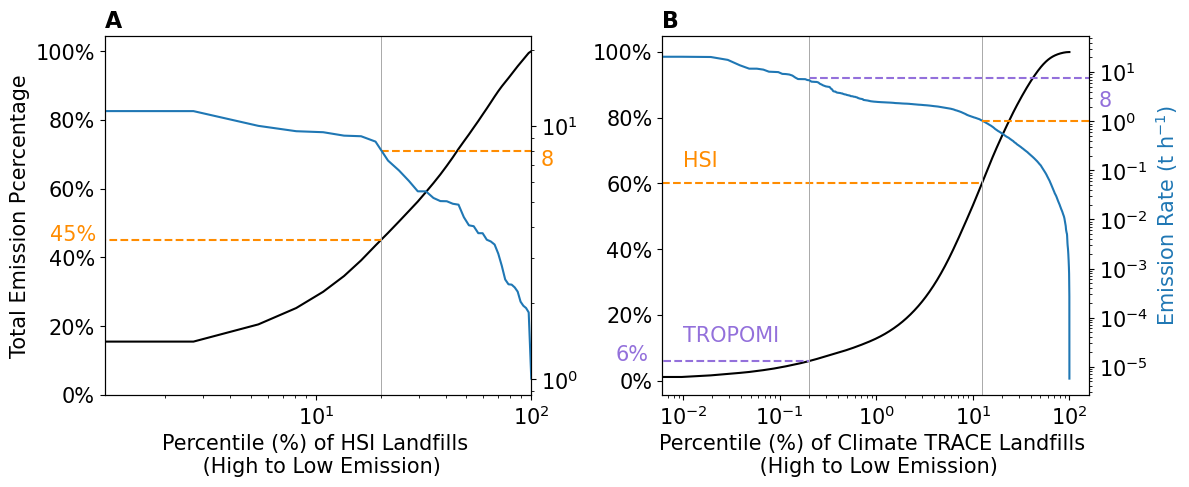

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs = axs.flatten()

for ax in axs:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# ----------- HSI -----------
ax = axs[0]
ax.set_xscale('log')

plot_cdf(emission_landfill, ax, twinaxis=None)

ax.set_xlabel('Percentile (%) of HSI Landfills \n (High to Low Emission)')
ax.set_ylabel('Total Emission Pcercentage')
# ax.axhline(y=0.70, c='darkorange', linestyle='--')
ax.axvline(x=20, c='darkgray', linestyle='-', linewidth=0.7)
ax.hlines(y=.71, xmin=20, xmax=100, color='darkorange', linestyle='--')  # 8 t/h
ax.hlines(y=.45, xmin=.01, xmax=20, color='darkorange', linestyle='--')

ax.text(0.58, 0.45, '45%', c='darkorange', size=font_size-2)
plt.text(110, 7, 8, c='darkorange', size=font_size-2)

# ax.xaxis.set_minor_locator(AutoMinorLocator(4))

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=100)


# ----------- Climate TRACE -----------
ax = axs[1]
# t/yr
ax2 = plot_cdf(df['emissions_quantity']/365/24, ax)

ax.set_xlabel('Percentile (%) of Climate TRACE Landfills \n (High to Low Emission)')
ax.set_ylabel('')
ax.set_xscale('log')

# TROPOMI detection limit
ax.text(.01, .12, 'TROPOMI', c='mediumpurple', size=font_size-2)
ax.hlines(y=0.06, xmin=1e-3, xmax=0.2, color='mediumpurple', linestyle='--')
ax.hlines(y=0.92, xmin=0.2, xmax=1e3, color='mediumpurple', linestyle='--')
plt.text(200, 2, 8, c='mediumpurple', size=font_size-2)
ax.text(.002, .06, '6%', c='mediumpurple', size=font_size-2)

# HSI detection limit
ax.text(.01, .65, 'HSI', c='darkorange', size=font_size-2)
ax.axvline(x=12.5, c='darkgray', linestyle='-', linewidth=0.7)
ax.axhline(y=0.6, xmin=0, xmax=0.75, c='darkorange', linestyle='--')
ax2.axhline(y=1, xmin=0.75, xmax=1e3, c='darkorange', linestyle='--')
# plt.text(200, .2, .5, c='darkorange', size=font_size-2)
# ax.text(.0015, .65, '60%', c='darkorange', size=font_size-2)

# vertical line
ax.axvline(x=0.2, c='darkgray', linestyle='-', linewidth=0.7)

axs[0].set_title('A', x=0.02, y=1.1, pad=-20)
axs[1].set_title('B', x=0.02, y=1.1, pad=-20)


fig.tight_layout()
fig.savefig('../figures/emission_cdf.pdf')

In [9]:
# total landfill emissions from ClimateTRACE
df['emissions_quantity'].sum()/1e6  # t/yr --> Tg/yr

36.7509102

In [10]:
print('Total Climate TRACE landfill numbers: ', len(df))

Total Climate TRACE landfill numbers:  10314
